In [49]:
# Questions:

# 1. what's the 20 most viewed Ted Talks of all time? (cause the nbr views is a good indicator of the popularity of the talk)
# 2. Comments [mean, max, min,]
# 3. Does comments have relationship with views? 
# 4. which talks tend to attract more comments? 
# 5. Month (which month has more talks) and (which day has most talks as well) & Year analysis
# 6. TED Talk vs. TEDx Talk 
# 7. Ted Speakers -- Most appearances and occupation
# 8. Ted Language -- is a good indicator to say the popularity in the world
# 9. durations
# 10.tags -- choose several and know the top 5 talks

In [2]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv("ted_main.csv")

In [50]:
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,dis_quo,month,Year
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,02,2006
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,02,2006
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,02,2006
3,200,"In an emotionally charged talk, MacArthur-winn...",18.600000,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,02,2006
4,593,You've never seen data presented like this. Wi...,19.833333,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,02,2006
5,672,"Tony Robbins discusses the ""invisible forces"" ...",21.750000,TED2006,01-02-2006,36,Tony Robbins,Tony Robbins: Why we do what we do,1,27-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401,0.000032,02,2006
6,919,When two young Mormon missionaries knock on Ju...,16.533333,TED2006,23-02-2006,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,09-07-2006,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987,0.000244,02,2006
7,46,Architect Joshua Prince-Ramus takes the audien...,19.966667,TED2006,22-02-2006,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,09-07-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741,0.000048,02,2006
8,852,Philosopher Dan Dennett calls for religion -- ...,24.750000,TED2006,01-02-2006,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,17-07-2006,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Tru

In [5]:
# tansfer the film_date and published_date to human readable format

import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [6]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
# Most Viewed Ted Talks of All Time

most_viewd_talks = df[['title', 'main_speaker', 'views', 'film_date' , 'published_date']].sort_values('views', ascending=False)[:20]
most_viewd_talks

# Observations:

# "Ken Robinson's" talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with 47.2 million views.
# There are only 2 talks have surpassed the 40 million mark and 4 talks that have crossed the 30 million mark.

,title,main_speaker,views,film_date,published_date
0,Do schools kill creativity?,Ken Robinson,47227110,24-02-2006,26-06-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,25-06-2012,01-10-2012
677,How great leaders inspire action,Simon Sinek,34309432,16-09-2009,04-05-2010
837,The power of vulnerability,Brené Brown,31168150,05-06-2010,23-12-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,05-02-2009,19-05-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,09-06-2013,27-06-2014
201,My stroke of insight,Jill Bolte Taylor,21190883,26-02-2008,11-03-2008
5,Why we do what we do,Tony Robbins,20685401,01-02-2006,27-06-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,07-12-2015,08-01-2016
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,26-10-2012,16-01-2013


In [8]:
df['published_date'][0]

# This one is the earliest published TED Talks in this Dataset.
# We find out that older TED Talks are also published in this date (26-06-2006)

'26-06-2006'

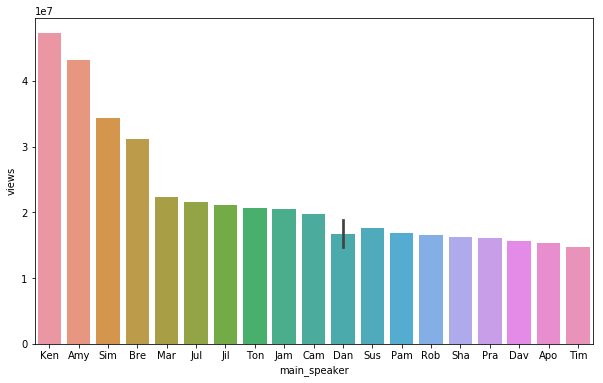

In [9]:
# Most viewd TED Talks plot

most_viewd_talks['main_speaker'] = most_viewd_talks['main_speaker'].apply(lambda x: x[:3])
plt.figure(figsize=(10,6))
sns.barplot(x='main_speaker', y='views', data=most_viewd_talks)
plt.tilte = "Most Viewd Taks and Main Speaker"

In [10]:
# Comments description for TED Talks of all time

df['comments'].describe()



# Observations

# The average comments on every TALK is 191.5;
# The high STD is a good indicator that the measure is be sensitive to outliers. (skewer) 
# The minimum comments is 2, probably this video was posted extremly recently. 

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

In [11]:
df[['views','comments']].corr()

# the correlationship between views and comments are 0.53, which indicates a medium strong relationship

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


In [12]:
#some comparison

df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)


# As we can see, talk titled "Do schooks kill creativity?" has more views but the comments are less than the talk titled "Millitant antheism". 
# (Interesting... It seems like some topics attract more comments while others not) 

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


In [13]:
#  which talks tend to attract more comments? 

# added new column to our original df
df['dis_quo'] = df['comments']/df['views']
df.head()

# sort data
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'tags','film_date']].sort_values('dis_quo', ascending=False).head(10)
df.head()

# Observations

# The case for same-sex marrighe attacted more disscussion;
# science and religion is still a very debated topic. 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,dis_quo
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049


In [14]:
# How the talks distributed over the year and month?

df['month'] = df['film_date'].apply(lambda x:x.split('-')[1])
month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']
month_df


,month,talks
0,02,645
1,03,354
2,06,271
3,07,250
4,11,240
5,10,205
6,04,172
7,05,123
8,09,114
9,12,111


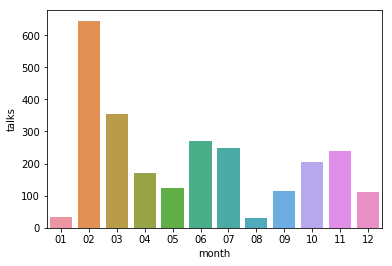

In [15]:
#plot

sns.barplot(x='month', y='talks', data=month_df)

# obersavation:
# Feb has the most talks. While August and Jan are slow months. Probably it is because the fact that officaial TED Conferences are held in Feb.
# useful link:https://www.quora.com/Whats-the-difference-between-TED-and-TEDx

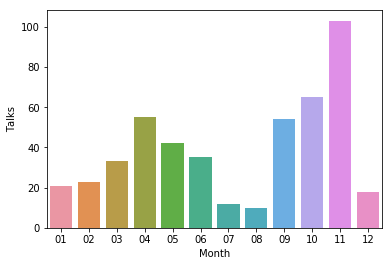

In [16]:
# Our dataset has TEDx as well so as comparison we count TEDx for each month

df_x = df[df['event'].str.contains('TEDx')]
df_x = pd.DataFrame(df_x['month'].value_counts()).reset_index()
df_x.columns = ['Month', 'Talks']
df_x

#plot
sns.barplot(x='Month', y='Talks', data=df_x)

# Observations

# as you can see compared to TED, TEDx has more talks on November. It might be the dataset we used is not at all represent all TEDx Talks

    Year  talks
0   2013    270
1   2011    270
2   2010    267
3   2012    267
4   2016    246
5   2015    239
6   2014    237
7   2009    232
8   2007    112
9   2017     98
10  2008     84
11  2005     66
12  2006     52
13  2004     33
14  2003     33
15  2002     27
16  1998      6
17  2001      5
18  1994      1
19  1990      1
20  1984      1
21  1972      1
22  1991      1
23  1983      1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

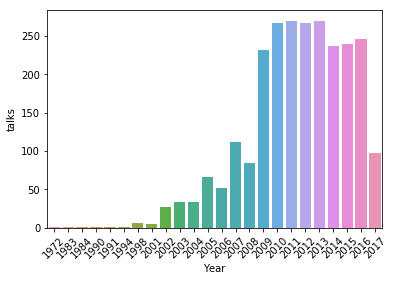

In [17]:
# Year Analysis - Which year has more talks? 

df['Year'] = df['film_date'].apply(lambda x:x.split('-')[2])
Year_df = pd.DataFrame(df['Year'].value_counts()).reset_index()
Year_df.columns = ['Year', 'talks']
print(Year_df)

# plot
sns.barplot(x='Year', y='talks', data=Year_df)
plt.xticks(rotation=45)

# Observations

# first TED Talk was on 1972
# 2011 and 2013 has the most TED Talks with 270 talks.

In [18]:
# The most popular speakers?
# Which speaker has the most films?

speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

# Observation: 

# Hans Rosling has most talks on TED with 9 talks.

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


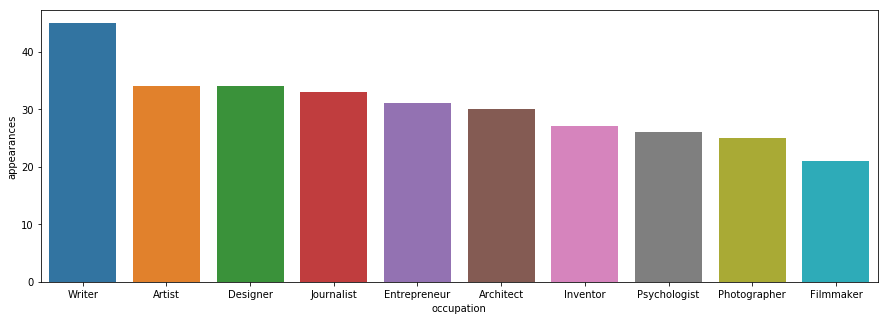

In [19]:
# which occupation occure more often?

occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
occupation_df.head()

plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()

# Observations:
# By occupation , Writers has highest number of talks in past few years.

In [20]:
# if there has a relationship between language and views? 

df['languages'].describe()

# Generally speaking, each talks has been translated into 27 languages. 

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [21]:
# what's the title of the one with 72 translations and 0 as well?

df[df['languages'] == 72]

# talk named "Is there something you've always meant to do, ...	" by Matt Cutts which is published in 01-07-2011 translated to 72 languages.

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,dis_quo,month,Year
973,736,"Is there something you've always meant to do, ...",207,TED2011,02-03-2011,72,Matt Cutts,Matt Cutts: Try something new for 30 days,1,01-07-2011,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",Technologist,"['culture', 'success']",Try something new for 30 days,https://www.ted.com/talks/matt_cutts_try_somet...,8838874,0.000083,03,2011


In [22]:
df[df['languages'] == 0] 

# as you can see there are lot of talks that never been translated.

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,dis_quo,month,Year
58,222,"Two Pilobolus dancers perform ""Symbiosis."" Doe...",825,TED2005,24-02-2005,0,Pilobolus,"Pilobolus: A dance of ""Symbiosis""",1,08-02-2007,"[{'id': 1, 'name': 'Beautiful', 'count': 1810}...","[{'id': 40, 'hero': 'https://pe.tedcdn.com/ima...",Dance company,"['dance', 'entertainment', 'nature', 'performa...","A dance of ""Symbiosis""",https://www.ted.com/talks/pilobolus_perform_sy...,3051507,0.000073,02,2005
115,27,The avant-garde string quartet Ethel performs ...,214,TED2006,01-02-2006,0,Ethel,"Ethel: A string quartet plays ""Blue Room""",1,18-06-2007,"[{'id': 1, 'name': 'Beautiful', 'count': 216},...","[{'id': 103, 'hero': 'https://pe.tedcdn.com/im...",String quartet,"['cello', 'collaboration', 'culture', 'enterta...","A string quartet plays ""Blue Room""",https://www.ted.com/talks/ethel_performs_blue_...,384641,0.000070,02,2006
135,36,After Vusi Mahlasela's 3-song set at TEDGlobal...,299,TEDGlobal 2007,07-06-2007,0,Vusi Mahlasela,"Vusi Mahlasela: ""Woza""",1,21-08-2007,"[{'id': 8, 'name': 'Informative', 'count': 4},...","[{'id': 158, 'hero': 'https://pe.tedcdn.com/im...","Musician, activist","['Africa', 'entertainment', 'guitar', 'live mu...","""Woza""",https://www.ted.com/talks/vusi_mahlasela_s_enc...,416603,0.000086,06,2007
209,67,"Rokia Traore sings the moving ""M'Bifo,"" accomp...",419,TEDGlobal 2007,05-06-2007,0,Rokia Traore,"Rokia Traore: ""M'Bifo""",1,26-03-2008,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 5...","[{'id': 265, 'hero': 'https://pe.tedcdn.com/im...",Singer-songwriter,"['Africa', 'entertainment', 'guitar', 'live mu...","""M'Bifo""",https://www.ted.com/talks/rokia_traore_sings_m...,294936,0.000227,06,2007
237,43,"Singer-songwriter Rokia Traore performs ""Kouna...",386,TEDGlobal 2007,05-06-2007,0,Rokia Traore,"Rokia Traore: ""Kounandi""",1,04-06-2008,"[{'id': 22, 'name': 'Fascinating', 'count': 84...","[{'id': 186, 'hero': 'https://pe.tedcdn.com/im...",Singer-songwriter,"['Africa', 'guitar', 'live music', 'music', 's...","""Kounandi""",https://www.ted.com/talks/rokia_traore_sings_k...,82488,0.000521,06,2007
249,50,Composer Sxip Shirey makes music from the simp...,186,TED2008,11-02-2008,0,Sxip Shirey + Rachelle Garniez,Sxip Shirey + Rachelle Garniez: A performance ...,2,29-06-2008,"[{'id': 9, 'name': 'Ingenious', 'count': 44}, ...","[{'id': 115, 'hero': 'https://pe.tedcdn.com/im...",Musician,"['entertainment', 'live music', 'music']","A performance with breath, music, passion",https://www.ted.com/talks/sxip_shirey_at_the_b...,217663,0.000230,02,2008
399,194,"Eric Lewis, an astonishingly talented crossove...",636,TED2009,05-02-2009,0,Eric Lewis,Eric Lewis: Piano jazz that rocks,1,05-03-2009,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...","[{'id': 46, 'hero': 'https://pe.tedcdn.com/ima...",Pianist,"['entertainment', 'innovation', 'invention', '...",Piano jazz that rocks,https://www.ted.com/talks/eric_lewis_strikes_c...,697257,0.000278,02,2009
446,138,Eric Lewis explores the piano's expressive pow...,294,TED2009,04-02-2009,0,Eric Lewis,Eric Lewis: Chaos and harmony on piano,1,11-05-2009,"[{'id': 26, 'name': 'Obnoxious', 'count': 84},...","[{'id': 478, 'hero': 'https://pe.tedcdn.com/im...",Pianist,"['art', 'entertainment', 'live music', 'music'...",Chaos and harmony on piano,https://www.ted.com/talks/eric_lewis_plays_cha...,391427,0.000353,02,2009
474,135,Organ virtuoso Qi Zhang plays her electric ren...,185,TEDxUSC,22-03-2009,0,Qi Zhang,Qi Zhang: An electrifying organ performance,1,19-06-2009,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 46, 'hero': 'https://pe.tedcdn.com/ima...",Organist,"['TEDx', 'china', 'music', 'performance', 'pia...",An electrifying organ performance,https://www.ted.com/talks/qi_zhang_s_electrify...,803691,0.000168,03,2009
512,146,Vishal Vaid and his band explore a traditional...,8

In [23]:
# Durationg analysis

df['duration'] = df['duration']/60
df['duration'].describe()

# Observations:
# the average length is 13.8 minutes, the max is 87.6 minutes and the shortest one is 2.25 minutes
# information about these talks are described below.

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

In [31]:
# Information about Longest and shortest TED's
talk_duration= df[['title', 'main_speaker', 'views', 'film_date','duration']]
Longest = talk_duration.sort_values('duration', ascending=False)[:20]
Longest

Shortest = talk_duration.sort_values('duration', ascending=True)[:20]
Shortest


# Talk named "Parrots, the universe and everytby hing" by Douglas Adams is the longest TED talk which is 87.6 minutes.
# Talk named 'The ancestor of language' by Murray Gell-Mann is the shortes TED Talk with only 2.5 minute.

,title,main_speaker,views,film_date,duration
239,The ancestor of language,Murray Gell-Mann,785293,02-03-2007,2.250000
248,"""Clonie""",Nellie McKay,680591,28-02-2008,2.333333
547,The modern euphonium,Matthew White,771962,22-07-2009,2.350000
454,A supercharged motorcycle design,Yves Behar,556657,05-02-2009,2.383333
264,The wonder of Zulu wire art,Marisa Fick-Jordan,294961,05-06-2007,2.550000
606,"Weird, or just different?",Derek Sivers,2835976,05-11-2009,2.700000
86,"Global warming's theme song, ""Manhattan in Jan...",Jill Sobule,591379,25-02-2006,2.716667
1390,"Forget multitasking, try monotasking",Paolo Cardini,2324212,26-06-2012,2.866667
593,"Making maps to fight disaster, build economies",Lalitesh Katragadda,359942,08-11-2009,2.900000
722,"Don't build your home, grow it!",Mitchell Joachim,1332785,11-02-2010,2.933333


In [44]:
df.iloc[1]['ratings']
# rating should be the different type -- choose several categories to find the top 10  with title , speaker 

"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'Obnoxious', 'count': 131}, {'id': 25, 'name': 'OK', 'count': 203}]"

In [45]:
# for all possible tags:
# what are the talks that are the most of that tag?

from collections import defaultdict

tag_to_talk = defaultdict(list)
# dictionary stores a key for the name of the TAG and a list for its value
# the list is a list of tuples

for index, row in df.iterrows():
    talk_name = row['name']
    ratings = row['ratings']
    for tag_row in eval(ratings):  
        tag_to_talk[tag_row.get('name')].append((talk_name, tag_row.get('count')))

# notes about "eval"       
# Ratings column is looks like a dictionary but because we imported data from CSV file, python does not recognize it/
        # as dictionary , it reconize it as string! what 'eval' does is , to convert ratings column to a dictionary so we can itterate over. 


In [47]:
# each Talks has different categories/tags --- like tree map --- want to get the sub-items
sorted(tag_to_talk['Longwinded'], key=lambda x: x[1], reverse=True)[:5]

[('Daniel Libeskind: 17 words of architectural inspiration', 447),
 ('Jill Bolte Taylor: My stroke of insight', 398),
 ('Simon Sinek: How great leaders inspire action', 390),
 ('Ken Robinson: Do schools kill creativity?', 387),
 ('Steven Pinker: What our language habits reveal', 352)]

In [48]:
for_df = []

for tag, value in tag_to_talk.items():
    for row in value:
        talk, rating = row
        for_df.append({
            "tag": tag, 
            "talk": talk, 
            "rating": rating
        })
out = pd.DataFrame.from_records(for_df)

out.head()

# normalize for number of views? take ratings counts / nbr of views
# Then you could really find what is funniest, or most longwinded

,rating,tag,talk
0,19645,Funny,Ken Robinson: Do schools kill creativity?
1,544,Funny,Al Gore: Averting the climate crisis
2,964,Funny,David Pogue: Simplicity sells
3,59,Funny,Majora Carter: Greening the ghetto
4,1390,Funny,Hans Rosling: The best stats you've ever seen
